In [1]:
! pip install git+https://github.com/kyustorm7/option-valuation

  Cloning https://github.com/kyustorm7/option-valuation to /tmp/pip-req-build-nbem5pz_
  Running command git clone -q https://github.com/kyustorm7/option-valuation /tmp/pip-req-build-nbem5pz_
  Created wheel for optionval: filename=optionval-0.0.1-cp36-none-any.whl size=4678 sha256=5fc7abf72a6007c0f49aac656e38d2d6277a901af572314e98ee9a5819adc6ce
  Stored in directory: /tmp/pip-ephem-wheel-cache-sudikcza/wheels/b0/37/0a/8c053dd4535ee4fb71a11b261b526a276bff58b929105146b1
Successfully built optionval


#Blackscholes (import optionval.values)

C: 콜옵션 가격 / Call option price  
P: 풋옵션 가격/ Put option price     
N: 정규분포함수 / CDF of the normal distribution  
S: 주식 현물 가격 / Current value of underlying asset  
E: 옵션 행사가 / Exercise price  
r: 무위험 이자율 / Annual risk-free interest rate over the period from now to expiration date   
T: 총 년도수 / Time to expiration date(in years)  
sigma: 변동성 지수 / Standard deviation (per year) of continuous stock returns

## $d_1 = \frac{ln(\frac{S}{E}) + (r+\frac{\sigma^2}{2})T}{\sigma \sqrt{T}}$  
## $d_2 = d_1 - \sigma \sqrt{T}$

In [2]:
from optionval.values import d1

# Calculate d1 value used in blackscholes model with the arguments
d1(S=50, E=50, T=5/12, r=0.1, sigma=0.4)

0.1210307295689818

In [3]:
from optionval.values import d2

# Calculate d2 value used in blackscholes model with the arguments
d2(S=50, E=50, T=5/12, r=0.1, sigma=0.4)

-0.13716816017817934

**Vega** measures sensitivity to volatility. Vega is the derivative of the option value with respect to the volatility of the underlying asset.  
**Theta** measures the sensitivity of the value of the derivative to the passage of time (see Option time value): the "time decay."  
**Gamma** measures the rate of change in the delta with respect to changes in the underlying price. Gamma is the second derivative of the value function with respect to the underlying price.  
**Rho** measures sensitivity to the interest rate: it is the derivative of the option value with respect to the risk free interest rate (for the relevant outstanding term).

https://en.wikipedia.org/wiki/Greeks_(finance)#Vega <- 참고

In [4]:
from optionval.values import call_delta

# Calculate delta in call option with the arguments
call_delta(S=50, E=50, T=5/12, r=0.1, sigma=0.4)

0.5481666522875089

In [5]:
from optionval.values import call_gamma

# Calculate gamma in call option with the arguments
call_gamma(S=50, E=50, T=5/12, r=0.1, sigma=0.4)

0.030676430456253966

In [6]:
from optionval.values import call_vega

#Calculate vega in call option with the arguments
call_vega(S=50, E=50, T=5/12, r=0.1, sigma=0.4)

0.12781846023439153

In [7]:
from optionval.values import call_theta

# Calculate theta in call option with the arguments
call_theta(S=50, E=50, T=5/12, r=0.1, sigma=0.4)

-0.08271635719860926

In [8]:
from optionval.values import call_rho

# Calculate rho in call option with the arguments
call_rho(S=50, E=50, T=5/12, r=0.1, sigma=0.4)

0.08901456785875553

In [9]:
from optionval.values import put_delta

# Calculate delta in put option with the arguments
put_delta(S=50, E=50, T=5/12, r=0.1, sigma=0.4)

-0.45183334771249106

In [10]:
from optionval.values import put_gamma

# Calculate gamma in put option with the arguments
put_gamma(S=50, E=50, T=5/12, r=0.1, sigma=0.4)

0.030676430456253966

In [11]:
from optionval.values import put_vega

# Calculate vega in put option with the arguments
put_vega(S=50, E=50, T=5/12, r=0.1, sigma=0.4)

0.12781846023439153

In [12]:
from optionval.values import put_theta

# Calculate theta in put option with the arguments
put_theta(S=50, E=50, T=5/12, r=0.1, sigma=0.4)

-0.03475688434315235

In [13]:
from optionval.values import put_rho

# Calculate rho in put option with the arguments
put_rho(S=50, E=50, T=5/12, r=0.1, sigma=0.4)

-0.11081656903898161

In [14]:
from optionval.values import blackscholes

# Calculate option value through blackscholes model with the arguments
blackscholes(S=50, E=50, T=5/12, r=0.1, sigma=0.4, PutCall='C')

6.044836328274123

## $\sigma_r^2 = x_S^2\sigma_S^2 + x_B^2\sigma_B^2 + 2x_Sx_B\sigma_{SB}$

In [15]:
from optionval.values import volatility

# Calculate a volatility of the firm’s asset with the arguments 
# assuming that there are only one type of common stock and one type of bond

volatility(stock_sd=0.3, bond_sd=0.2, stock_weight=0.6,bond_weight=0.4, corr=0.5)

0.2814249455894058

# Binomial Trees (import optionval.trees)

n = 총 단계수 / number of binomial steps   
S = 주식 초기 가격 / initial stock price   
K = 옵션 행사가 / strike price   
r = 무위험 이자율 / risk free interest rate per annum   
v = 변동성 지수 / volatility factor   
t = 총 년도수 / Time to expiration date(in years)   
    ex) 5개월이면 t = 5/12   
Putcall = 옵션 종류 / Option Type   

## $P = \frac{e^{r \vartriangle t} - d}{u - d} $
## $u = e^{\sigma \sqrt{\vartriangle t}}$
## $d = \frac{1}{u}$
## $\vartriangle t = \frac{n}{t}$

In [16]:
from optionval.trees import BinomialAmerican

# Calculate American option value through binomial tree model
BinomialAmerican(n=5, S=50, K=50, r=0.1, v=0.4, t=5/12, PutCall = "P")

4.488458534725914

In [17]:
from optionval.trees import BinomialEuropean

# Calculate European option value through binomial tree model 
BinomialEuropean(n=5, S=50, K=50, r=0.1, v=0.4, t=5/12)

6.35954586105892

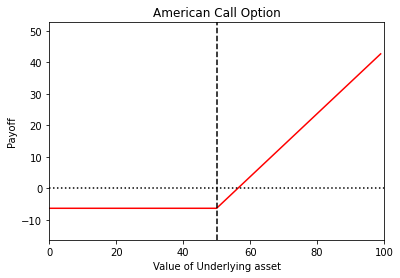

In [18]:
from optionval.trees import BinomialAmerican_graph

# Visualize American option payoff diagram (Payoff – Value of Underlying asset) through binomial tree model
BinomialAmerican_graph(n=5, S=50, K=50, r=0.1, v=0.4, t=5/12, PutCall = 'C')

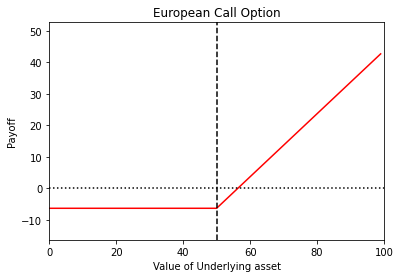

In [19]:
from optionval.trees import BinomialEuropean_graph

# Visualize European option payoff diagram (Payoff – Value of Underlying asset) through binomial tree model
BinomialEuropean_graph(n=5, S=50, K=50, r=0.1, v=0.4, t=5/12, PutCall = 'C')

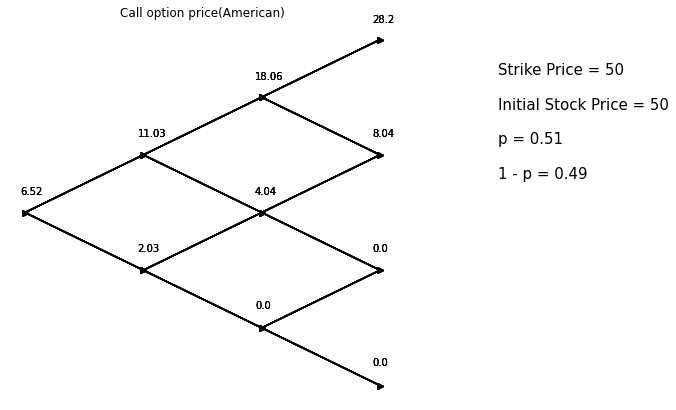

In [23]:
from optionval.trees import BinomialAmerican_tree

#Visualize American option valuation process through binomial tree model
BinomialAmerican_tree(3, 50, 50, 0.1, 0.4, 5/12, "C")

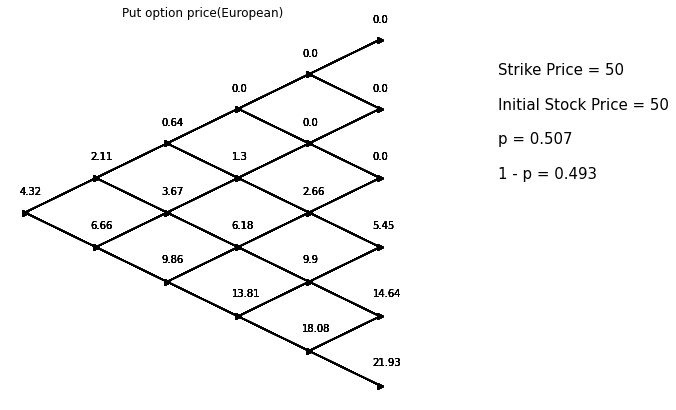

In [22]:
from optionval.trees import BinomialEuropean_tree

#Visualize European option valuation process through binomial tree model with the given arguments
BinomialEuropean_tree(n=5,S=50,K=50,r=0.1,v=0.4,t=5/12, PutCall = "P")